# Mini-Proj **Text-Mining & Web-Mining Tweets Analysis**<div>

### Benimam Abdelmadjid


## Data acquisition


In [2]:
from tweepy.streaming import StreamingClient  
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy

#Variables that contains the user credentials to access Twitter API 
BearerToken="xxxxxxxxxx"
access_token = "xxxxxxxxxx"
access_token_secret = "xxxxxxxxxx"
consumer_key = "xxxxxxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxxxx"

client = tweepy.Client(BearerToken,consumer_key,consumer_secret,access_token,access_token_secret)
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)



In [7]:
query = f'#TheGameAwards -is:retweet  lang:en'
tweets = tweepy.Paginator(client.search_recent_tweets, 
                                query=query,
                                tweet_fields=['public_metrics', 'created_at','geo','lang','author_id'],
                                user_fields=['location'],
                                place_fields=["country"], 
                                expansions=['geo.place_id','author_id'],
                                start_time="2022-12-05T14:30:2.000Z",
                                # end_time="2022-12-05T13:35:47.000Z",
                                max_results=100
                              ).flatten(30000)

### Save acquired data in json file


In [ ]:
import json
f = open("twitter_files.json","w")
tweets_dict ={}
for i,t in enumerate(tweets):
    tweets_dict[t.data["id"]]= t.data
f.write(json.dumps(tweets_dict,ensure_ascii=False))
f.close()

In [9]:

f.write(json.dumps(tweets_dict,ensure_ascii=False))
f.close()

### Flatten public metrics with tweets data


In [41]:
import json
import os
dir_name = "gameawards"
json_list = os.listdir(dir_name)
# print(json_list)
alljfiles ={}
for jfile in json_list:
    f = open(dir_name+"/"+jfile,"r")
    print(jfile)
    s= ""
    jfile = json.loads(f.read())
    for k,v in jfile.items():
        for k2,v2 in v["public_metrics"].items():
            v[k2] = v2
        v.pop("public_metrics")
        v.pop("edit_history_tweet_ids")
        if v.get("geo") != None:
            v.pop("geo")
        
        s = k
        alljfiles[k] = v

socialmedia game awards3Twitter.json


### get places id


In [6]:
import json
import os
dir_name = "gameawards"
json_list = os.listdir(dir_name)
alljfiles ={}
places_count=[]
places = {}
for jfile in json_list:
    f = open(dir_name+"/"+jfile,"r")
    s= 0
    jfile = json.loads(f.read())
    for k,v in jfile.items():
        if v.get("geo"):
            s+=1
            places[v["geo"]["place_id"]] = v["geo"]
            places_count.append(v["geo"]["place_id"])
        


list_places_json={}
list_places_json["places"] = places_count
with open("places.json","w") as f:
    f.write(json.dumps(places))
with open("places_list.json","w") as f:
    f.write(json.dumps(list_places_json))


socialmedia game awards3Twitter.json


### Get place name by `place_id` using `tweepy.API`


In [ ]:
import json
api = tweepy.API(auth,wait_on_rate_limit=True)

with open("places.json","r") as f:
    places = json.loads(f.read())
    for k,v in places.items():
        if places[k].get("country") == None:
            places[k]["country"] = api.geo_id(k).country
with open("places.json","w") as f:
    f.write(json.dumps(places))

In [18]:
with open("places.json","w") as f:
    f.write(json.dumps(places))

## Preprocess tweets


In [7]:
import pandas as pd
import re


In [74]:
import preprocessor as p
import pandas as pd
json_df = pd.DataFrame(alljfiles)
pattern = re.compile(r'\W')
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stopwords = stopwords.words("english")
filter_pt = re.compile(r'')
json_df = json_df.T
for i,row in json_df.iterrows():
    row["text"] = p.clean(row["text"])
    row["text"] = re.sub(pattern," ",row["text"])
    tok = word_tokenize(str(row["text"]))
    tok = [w  for w in tok if w not in stopwords]
    row["text"] = " ".join(tok)
json_df.to_csv(dir_name+"_tweets.csv")

In [2]:

json_df = pd.read_csv("gameawards_tweets.csv")

In [44]:
positive = pd.read_csv("positive.csv")
negative = pd.read_csv("negative.csv")
for i,row in positive.iterrows():
    row["positive"] = re.escape(row["positive"])

for i,row in negative.iterrows():
    row["negative"] = re.escape(row["negative"])

print(positive)
print(negative)


        positive
0         abound
1        abounds
2      abundance
3       abundant
4     accessable
...          ...
2000    youthful
2001        zeal
2002      zenith
2003        zest
2004       zippy

[2005 rows x 1 columns]
        negative
0       2\-faced
1       2\-faces
2       abnormal
3        abolish
4     abominable
...          ...
4778        zaps
4779      zealot
4780     zealous
4781   zealously
4782      zombie

[4783 rows x 1 columns]


### Create postive and negative patterns


In [80]:

positive_pt = re.compile(r"(?=("+'|'.join(positive["positive"])+r"))")
negative_pt = re.compile(r"(?=("+'|'.join(negative["negative"])+r"))")
print(negative_pt)
s= "As a God Of War Fanboy Elden Ring definitely deserved GOTY  Not saying God Of War didn t As much as Elden ring isn t personally my taste  I can massively respect the hold and Impact that the game had on gaming for a solid while  Congrats Elden Ring "
print(negative_pt.findall(s.lower()))
print(positive_pt.findall(s.lower()))

re.compile('(?=(2\\-faced|2\\-faces|abnormal|abolish|abominable|abominably|abominate|abomination|abort|aborted|aborts|abrade|abrasive|abrupt|abruptly|abscond|absence|absent\\-minded|absentee|absurd|absurdity|abs)
[]
['respect', 'solid']


#### product list


In [5]:

games =["god of war","elden ring","Horizon Forbidden West","stray",
        "Xenoblade Chronicles","immortality","call of duty",
        "scorn","Citizen Sleeper","As Dusk Falls","FINAL FANTASY",
        "MARVEL SNAP","Moss","Bayonetta","multiversus",
        "Kirby and the Forgotten Land","Mario","gran Turismo",
        "Ludwig","VALORANT"
        ]

games = [g.lower() for g in  games]

In [12]:
import pandas as pd
from textblob import TextBlob
game_pattern = re.compile(r"(?=("+'|'.join(games[:])+r"))")

categories =[]
for i,row in json_df.iterrows():
    # x =positive_pt.findall(str(row["text"]))
    # row["positive"] = len(x)
    # row["negative"] = len(negative_pt.findall(str(row["text"])))
    
    blob = TextBlob(str(row["text"]))
    # print(blob.sentiment.polarity)
    for g in games:
        g_pt = re.compile(g)
        json_df.at[i,g] = len(g_pt.findall(str(row["text"]).lower()))
    json_df.at[i,"polarity"] = blob.sentiment.polarity
    # json_df.at[i,"negative"] = row["negative"]
# json_df[]
json_df

,Unnamed: 0,text,lang,created_at,author_id,id,retweet_count,reply_count,like_count,quote_count,...,marvel snap,moss,bayonetta,multiversus,kirby and the forgotten land,mario,gran turismo,ludwig,valorant,polarity
0,1601545366713032704,that you signing on Death Stranding,en,2022-12-10T11:52:25.000Z,1698850794,1601545366713032704,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1601544503500115971,Hey you forgot something The Game Awards A...,en,2022-12-10T11:48:59.000Z,710319331507310593,1601544503500115971,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4
2,1601544358821392384,The manager of Manchester United claims that C...,en,2022-12-10T11:48:25.000Z,1590682460936962057,1601544358821392384,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1601544317843099649,I just want to nominate this award to my refor...,en,2022-12-10T11:48:15.000Z,1100459308821766145,1601544317843099649,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2
4,1601544192861171714,Skip to 40 minutes to hear what he wants...,en,2022-12-10T11:47:45.000Z,1663685791,1601544192861171714,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1601062673268948993,Someone give buddy with the afro an award in t...,en,2022-12-09T03:54:22.000Z,1292950412316872711,1601062673268948993,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1601062673147387904,Flute guy tweet,en,2022-12-09T03:54:22.000Z,135606920,1601062673147387904,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,1601062673101524992,Very impressive musical number,en,2022-12-09T03:54:22.000Z,69986816,1601062673101524992,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
29998,1601062672794984448,Shoutouts to the Flute player in the orchestra...,en,2022-12-09T03:54:22.000Z,93752748,1601062672794984448,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dir_name= "gameawards"
json_df.to_csv(dir_name+"_tweetsV2.csv")


In [94]:
json_df

,text,lang,created_at,author_id,id,retweet_count,reply_count,like_count,quote_count,withheld
1601545366713032704,signing Death Stranding,en,2022-12-10T11:52:25.000Z,1698850794,1601545366713032704,0,0,0,0,NaN
1601544503500115971,Hey forgot something The Game Awards After Par...,en,2022-12-10T11:48:59.000Z,710319331507310593,1601544503500115971,0,0,0,0,NaN
1601544358821392384,The manager Manchester United claims Cristiano...,en,2022-12-10T11:48:25.000Z,1590682460936962057,1601544358821392384,0,0,0,0,NaN
1601544317843099649,I want nominate award reformed orthodox rabbi ...,en,2022-12-10T11:48:15.000Z,1100459308821766145,1601544317843099649,0,0,0,0,NaN
1601544192861171714,Skip 40 minutes hear wants say interruption Th...,en,2022-12-10T11:47:45.000Z,1663685791,1601544192861171714,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1601062673268948993,Someone give buddy afro award orchestra He swi...,en,2022-12-09T03:54:22.000Z,1292950412316872711,1601062673268948993,0,0,2,0,NaN
1601062673147387904,Flute guy tweet,en,2022-12-09T03:54:22.000Z,135606920,1601062673147387904,0,0,1,0,NaN
1601062673101524992,Very impressive musical number,en,2022-12-09T03:54:22.000Z,69986816,1601062673101524992,0,0,0,0,NaN
1601062672794984448,Shoutouts Flute player orchestra losing absolu...,en,2022-12-09T03:54:22.000Z,93752748,1601062672794984448,0,0,1,0,NaN


In [19]:
for g in games:
    df = json_df.loc[json_df[g] != 0]
    g_df = pd.DataFrame(df,columns=["id","text","created_at",g,"retweet_count","reply_count","like_count","quote_count","polarity"])
    # g_df["polarity"]= -g_df["negative"] +g_df["positive"]
    # g_df = g_df.drop(["positive","negative"],axis=1)
    g_df.to_csv("game_name/"+g+".csv",index="id")

## Plots


### Region Plot


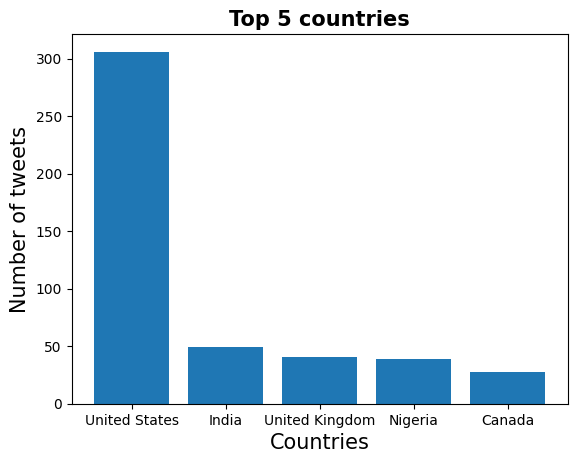

In [75]:
import matplotlib.pyplot as plt
from collections import Counter
# tweets_by_country = tweets['country'].value_counts()
import json
with open("places.json","r") as f:
    places = json.loads(f.read())
with open("places_list.json","r") as f:
    places_list = json.loads(f.read())
places_list = places_list["places"]
for i,pid in enumerate(places_list):
    places_list[i] = places[pid]["country"]
c = Counter(places_list)
top_5_countries = c.most_common(5)
top_5_countries,n = [w[0] for w in top_5_countries],[w[1] for w in top_5_countries]

# print(top_5_countries[0][:])
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
x_coordinates = range(len(top_5_countries))
ax.bar(x_coordinates, n, align='center')
# spacing = 0.6
fig.subplots_adjust(wspace=10)

ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
ax.xaxis.set_major_formatter(plt.FixedFormatter(top_5_countries))
fig.savefig("country_his.png",dpi=400)
# pd.Series(places_list).value_counts(sort=False).plot(kind='bar')
# tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

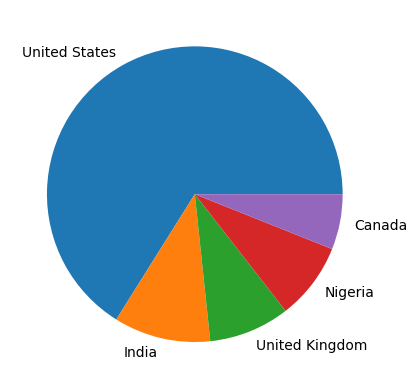

In [74]:

plt.pie(n,labels=top_5_countries)
# plt.show()
plt.savefig("country_pie.png",dpi=400)

### popularity plot


In [81]:
import pandas as pd
popularity_count={}
for g in games:
    g_df = pd.read_csv("game_name/"+g+".csv")
    popularity_count[g]={}
    popularity_count[g]["retweet_count"]=  g_df["retweet_count"].sum()
    popularity_count[g]["like_count"]=  g_df["like_count"].sum()
    popularity_count[g]["reply_count"]=  g_df["reply_count"].sum()
    popularity_count[g]["quote_count"]=  g_df["quote_count"].sum()
    popularity_count[g]["mean"] = sum([v for k,v in popularity_count[g].items()])/4
print(popularity_count)

{'god of war': {'retweet_count': 546, 'like_count': 4792, 'reply_count': 464, 'quote_count': 39, 'mean': 1460.25}, 'elden ring': {'retweet_count': 57337, 'like_count': 458571, 'reply_count': 7790, 'quote_count': 11767, 'mean': 133866.25}, 'horizon forbidden west': {'retweet_count': 78, 'like_count': 513, 'reply_count': 50, 'quote_count': 6, 'mean': 161.75}, 'stray': {'retweet_count': 290, 'like_count': 3655, 'reply_count': 101, 'quote_count': 15, 'mean': 1015.25}, 'xenoblade chronicles': {'retweet_count': 112, 'like_count': 746, 'reply_count': 27, 'quote_count': 6, 'mean': 222.75}, 'immortality': {'retweet_count': 3, 'like_count': 20, 'reply_count': 4, 'quote_count': 0, 'mean': 6.75}, 'call of duty': {'retweet_count': 15, 'like_count': 96, 'reply_count': 7, 'quote_count': 0, 'mean': 29.5}, 'scorn': {'retweet_count': 3, 'like_count': 6, 'reply_count': 2, 'quote_count': 0, 'mean': 2.75}, 'citizen sleeper': {'retweet_count': 0, 'like_count': 0, 'reply_count': 0, 'quote_count': 0, 'mean': 

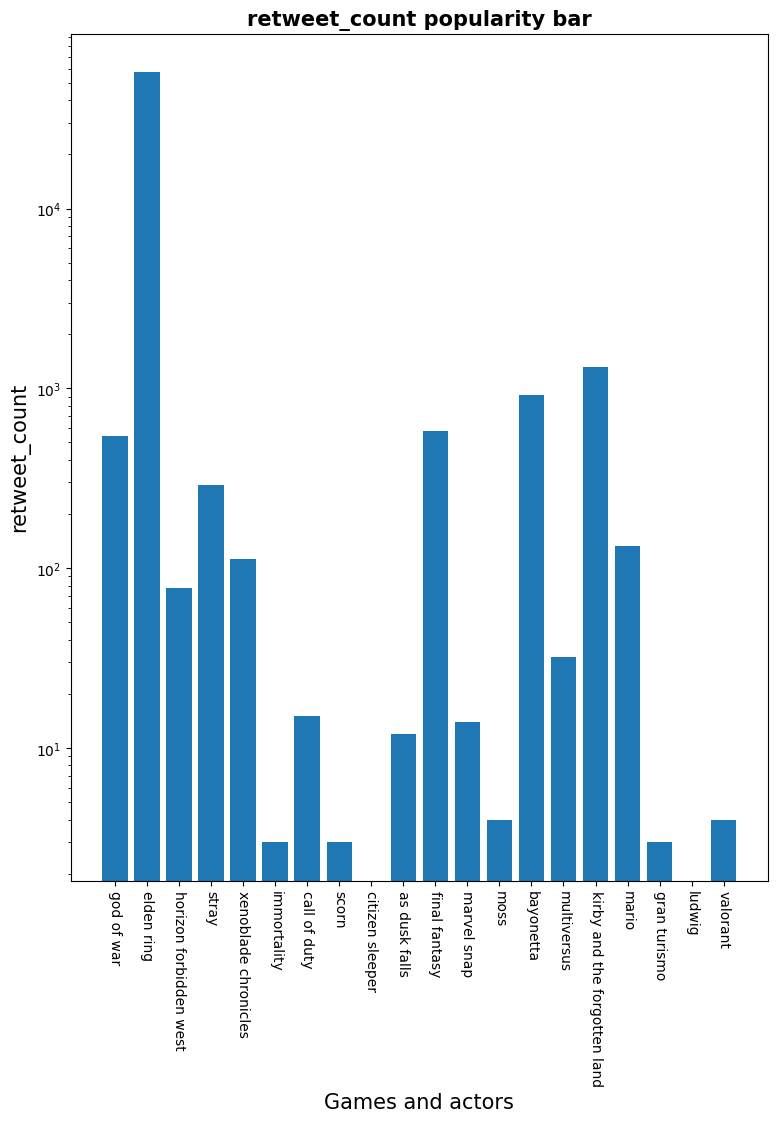

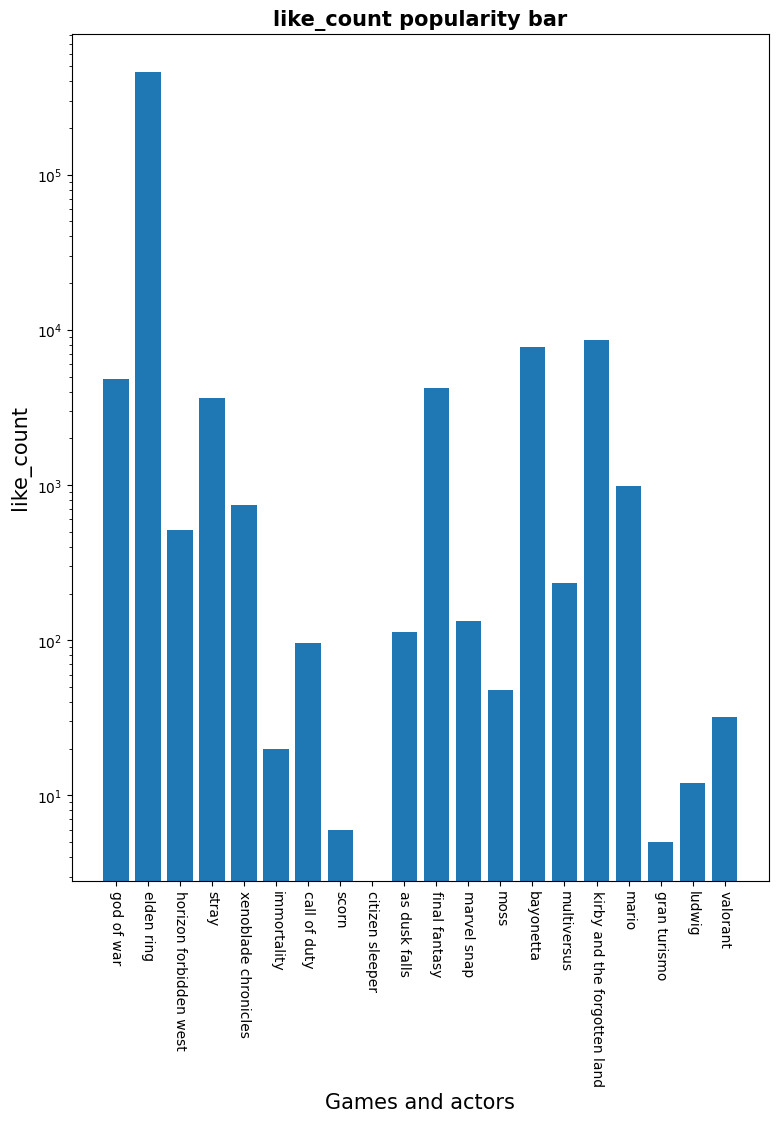

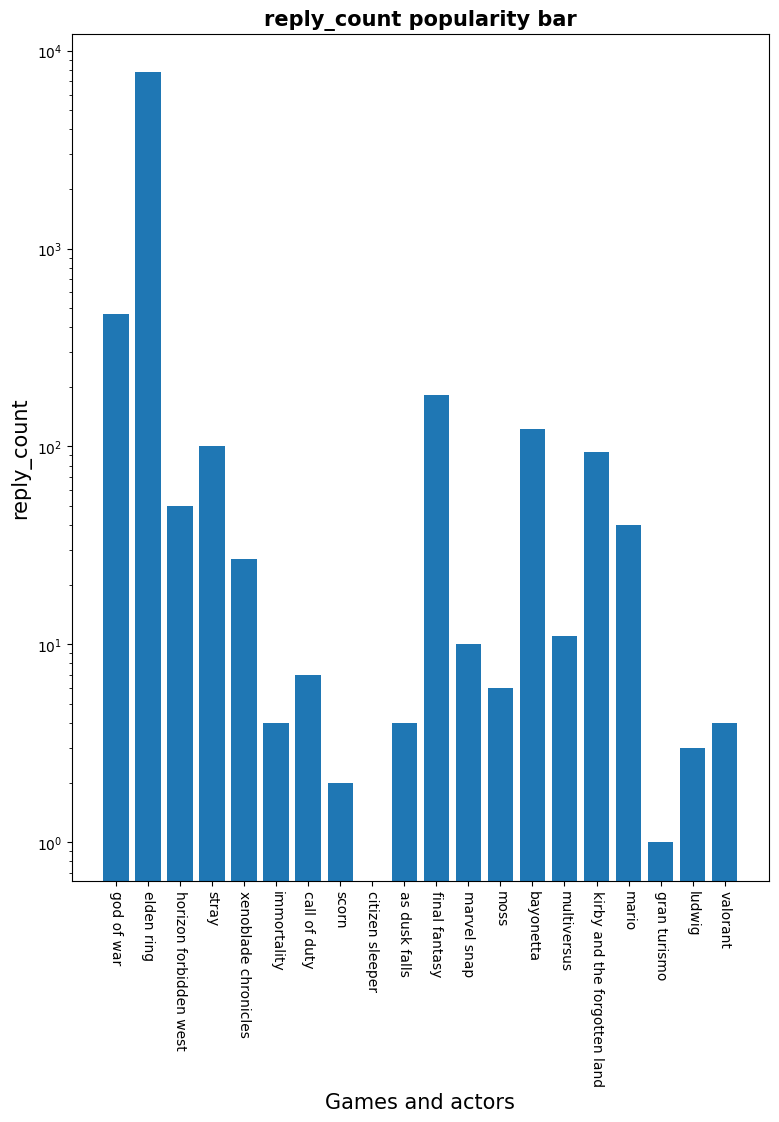

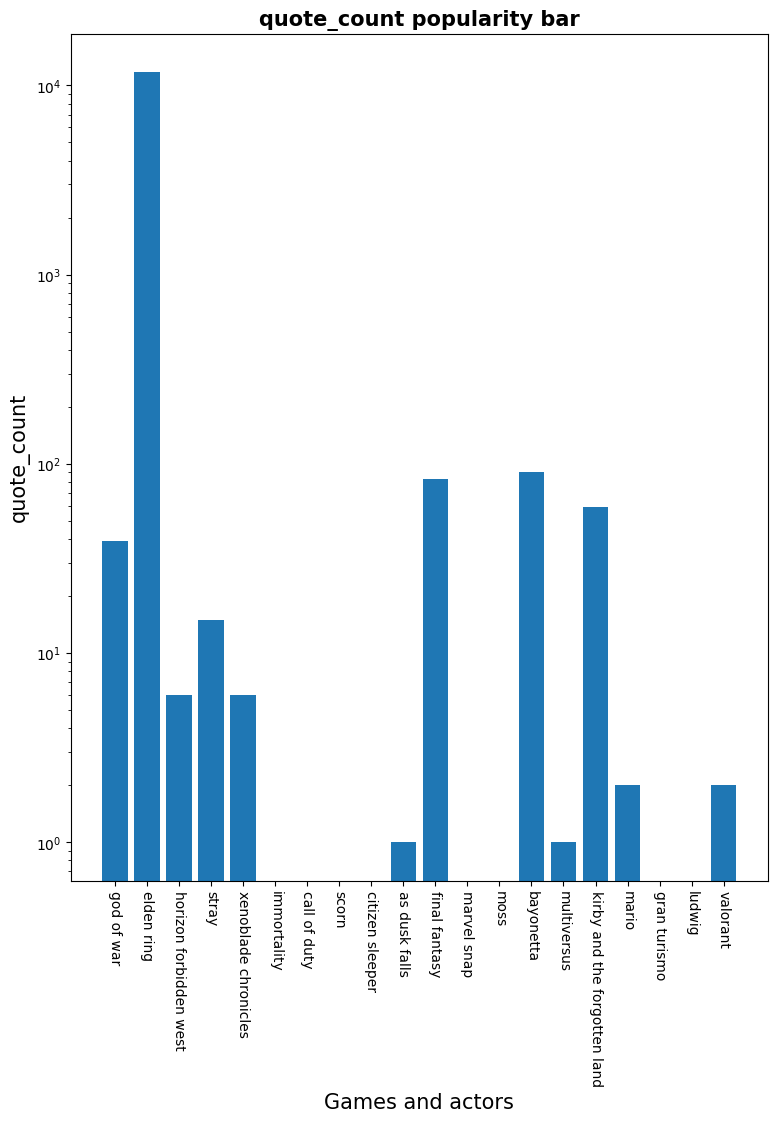

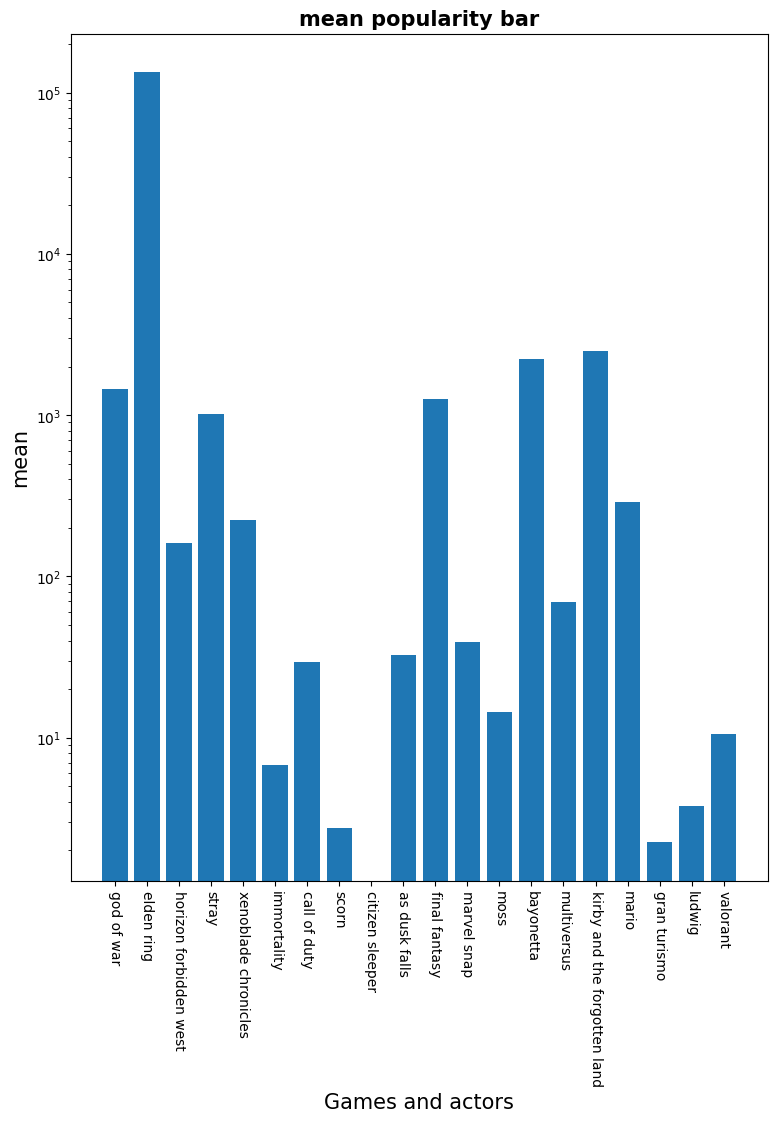

In [84]:
import matplotlib.pyplot as plt
# print(top_5_countries[0][:])
dirname="plots"
for k in popularity_count[games[0]].keys():
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 11)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel("Games and actors", fontsize=15)
    ax.set_ylabel(k , fontsize=15)
    ax.set_title(k+' popularity bar', fontsize=15, fontweight='bold')
    x_coordinates = range(len(games))
    n = [popularity_count[g][k] for g in games ]
    ax.bar(x_coordinates, n, align='center')
    # spacing = 0.6
    # fig.subplots_adjust(wspace=10)
    ax.set_yscale("log")
    ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
    ax.xaxis.set_major_formatter(plt.FixedFormatter(games))
    ax.tick_params(axis='x', labelrotation=270) 
    fig.savefig(dirname+"/"+k+"_"+"g",dpi=400,)
    # plt.pie(n,labels=games)
    # plt.show()


In [18]:
json_df

,Unnamed: 0,text,lang,created_at,author_id,id,retweet_count,reply_count,like_count,quote_count,...,marvel snap,moss,bayonetta,multiversus,kirby and the forgotten land,mario,gran turismo,ludwig,valorant,polarity
0,1601545366713032704,that you signing on Death Stranding,en,2022-12-10T11:52:25.000Z,1698850794,1601545366713032704,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1601544503500115971,Hey you forgot something The Game Awards A...,en,2022-12-10T11:48:59.000Z,710319331507310593,1601544503500115971,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4
2,1601544358821392384,The manager of Manchester United claims that C...,en,2022-12-10T11:48:25.000Z,1590682460936962057,1601544358821392384,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1601544317843099649,I just want to nominate this award to my refor...,en,2022-12-10T11:48:15.000Z,1100459308821766145,1601544317843099649,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2
4,1601544192861171714,Skip to 40 minutes to hear what he wants...,en,2022-12-10T11:47:45.000Z,1663685791,1601544192861171714,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1601062673268948993,Someone give buddy with the afro an award in t...,en,2022-12-09T03:54:22.000Z,1292950412316872711,1601062673268948993,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1601062673147387904,Flute guy tweet,en,2022-12-09T03:54:22.000Z,135606920,1601062673147387904,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,1601062673101524992,Very impressive musical number,en,2022-12-09T03:54:22.000Z,69986816,1601062673101524992,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
29998,1601062672794984448,Shoutouts to the Flute player in the orchestra...,en,2022-12-09T03:54:22.000Z,93752748,1601062672794984448,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### positivity plot


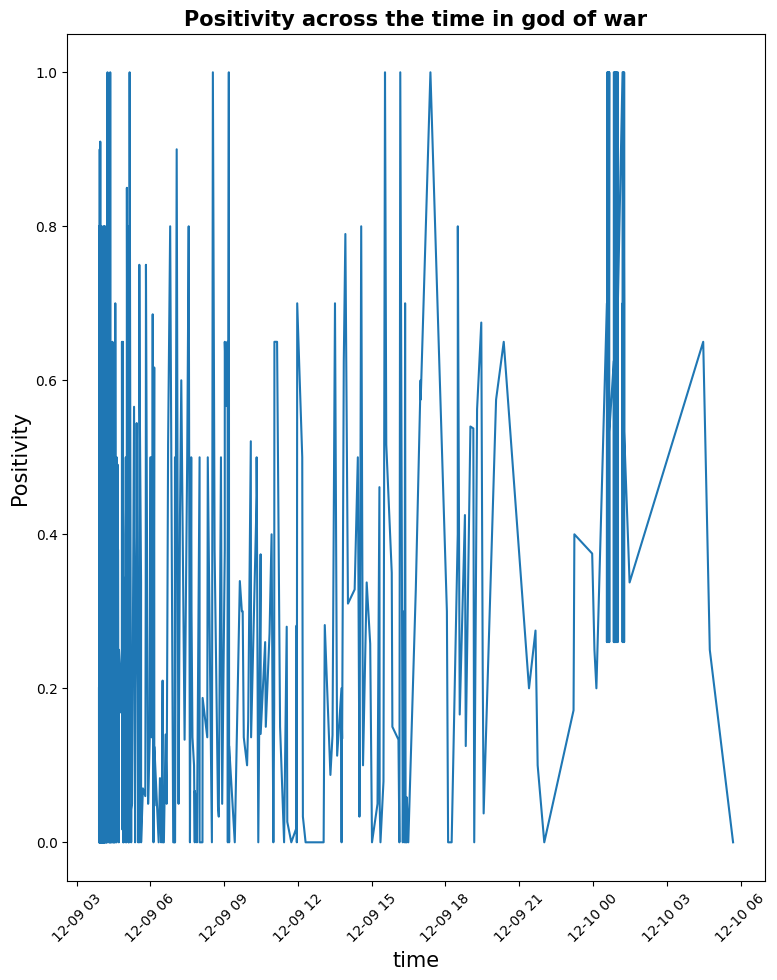

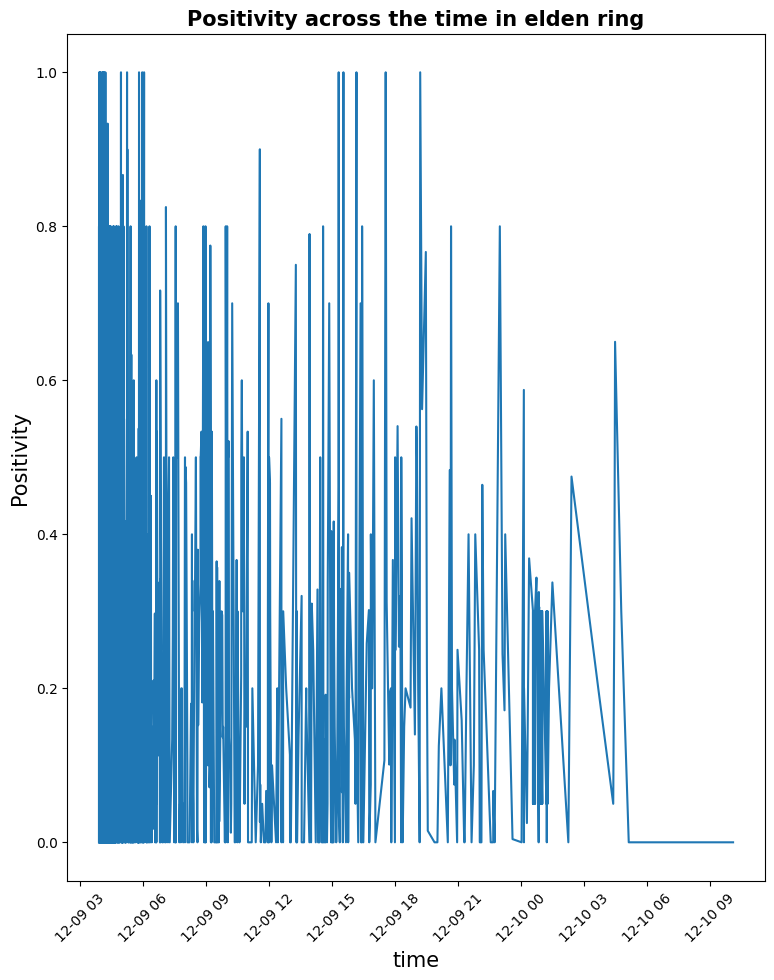

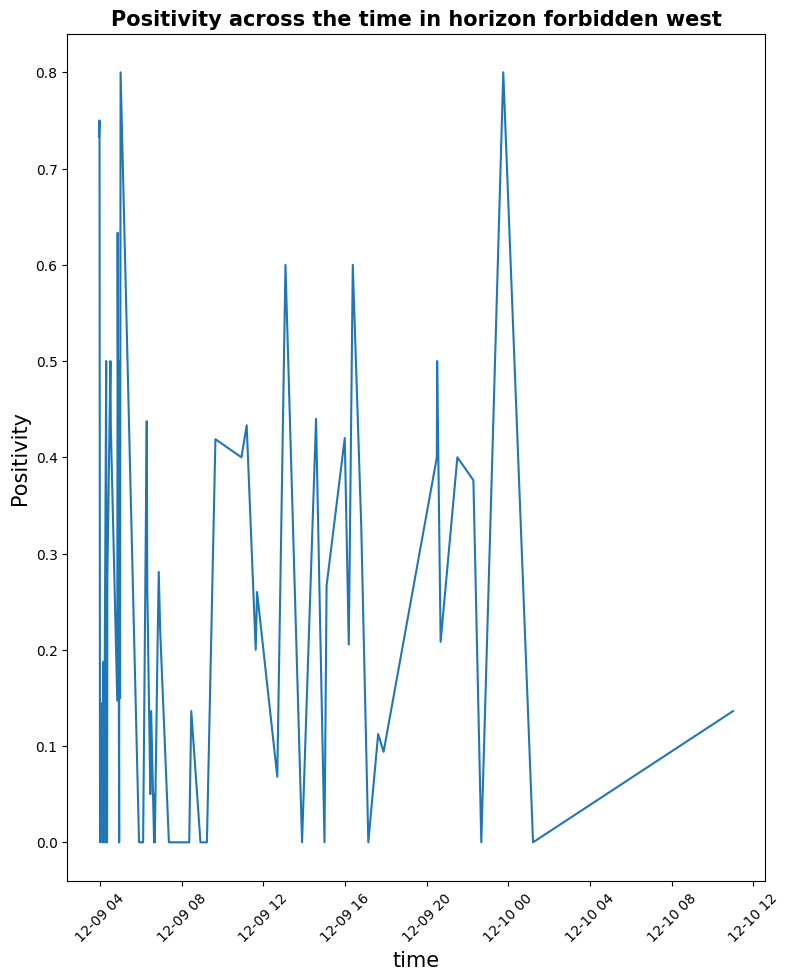

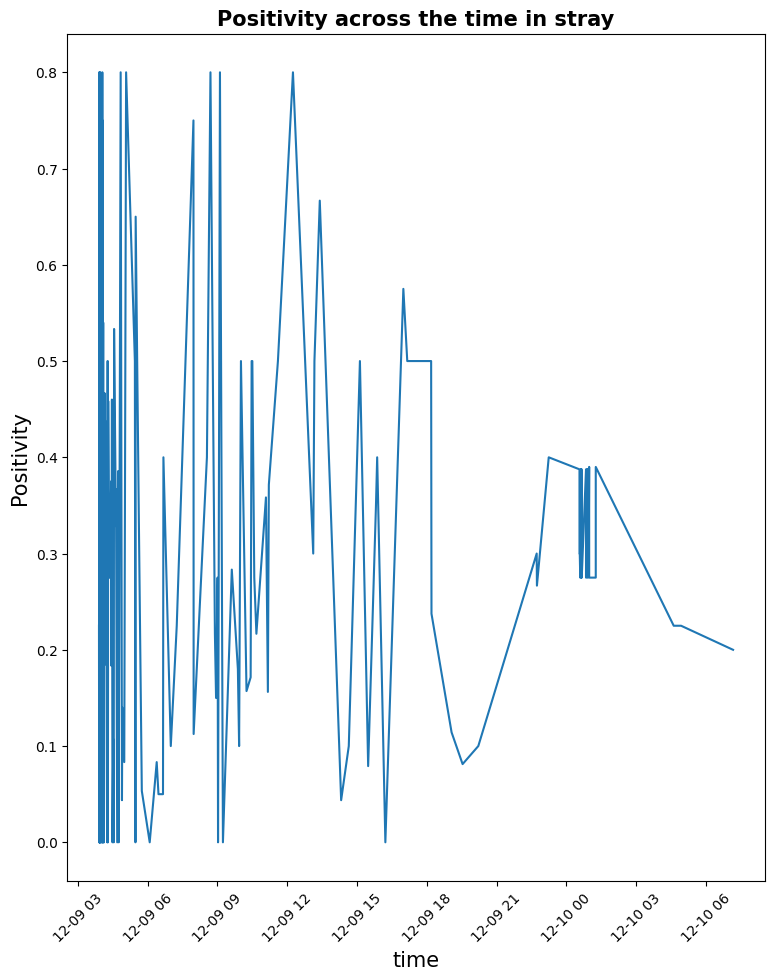

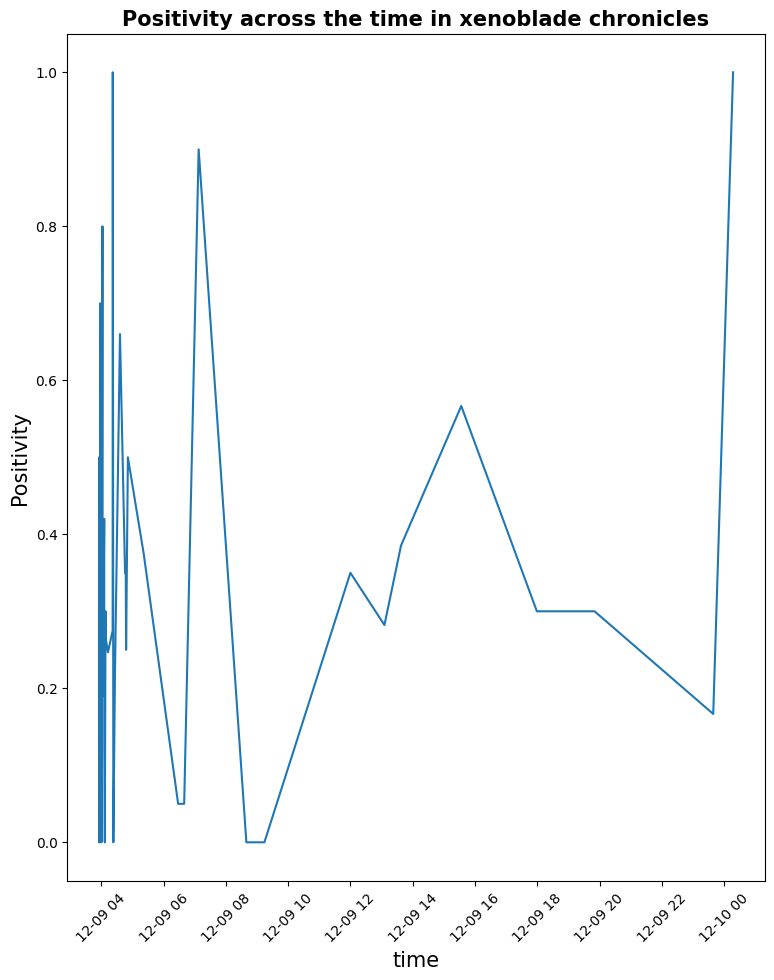

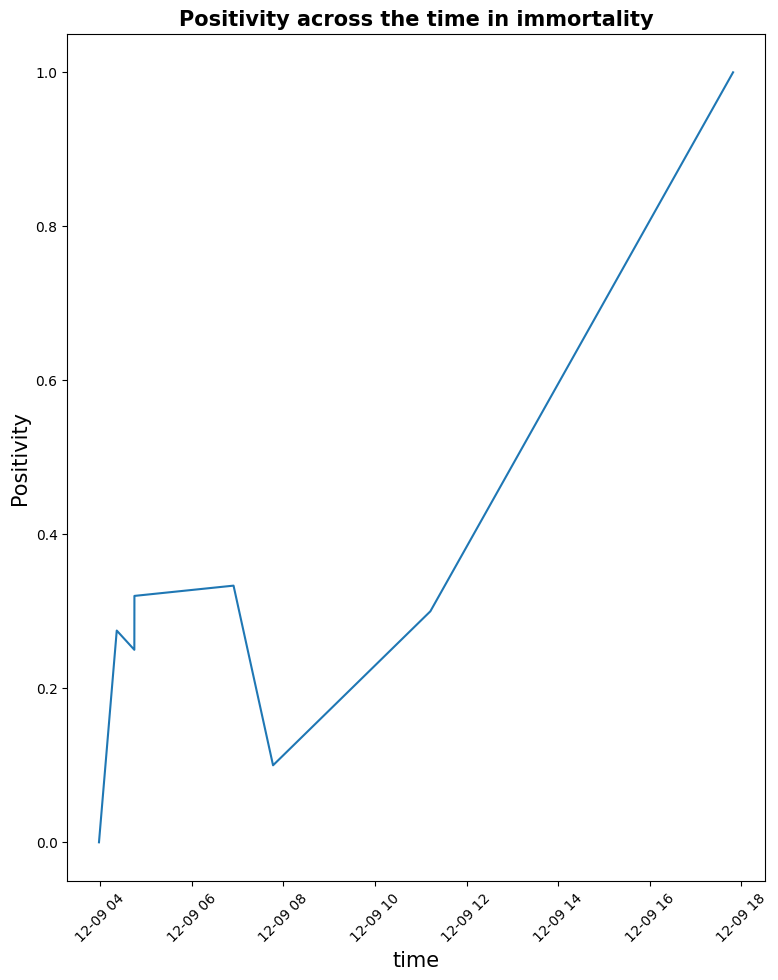

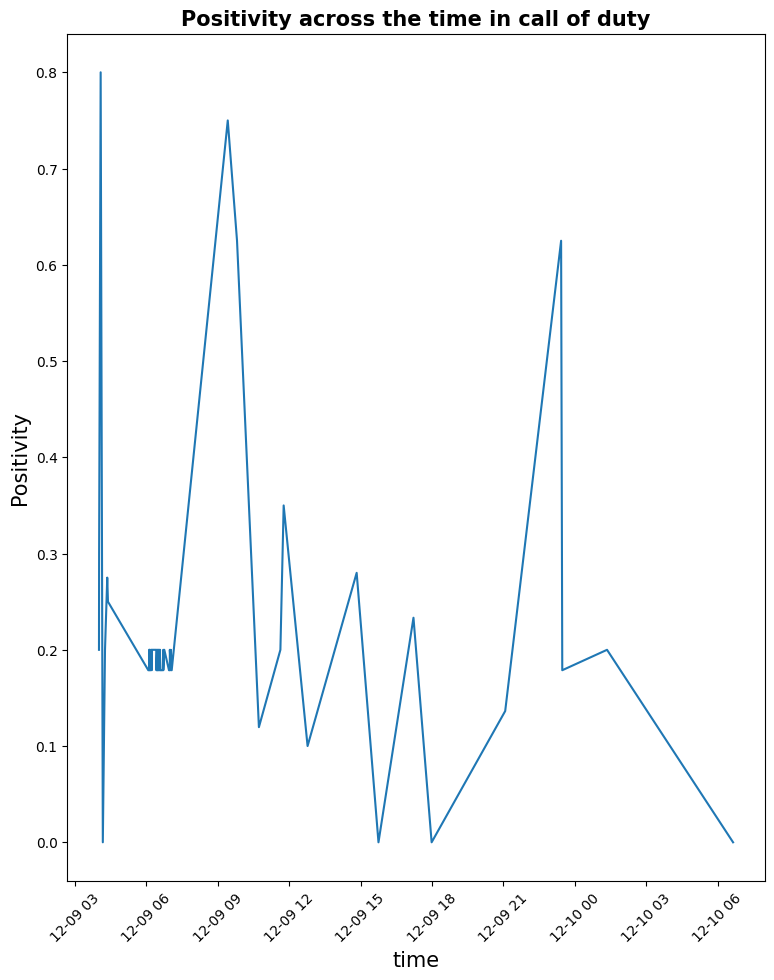

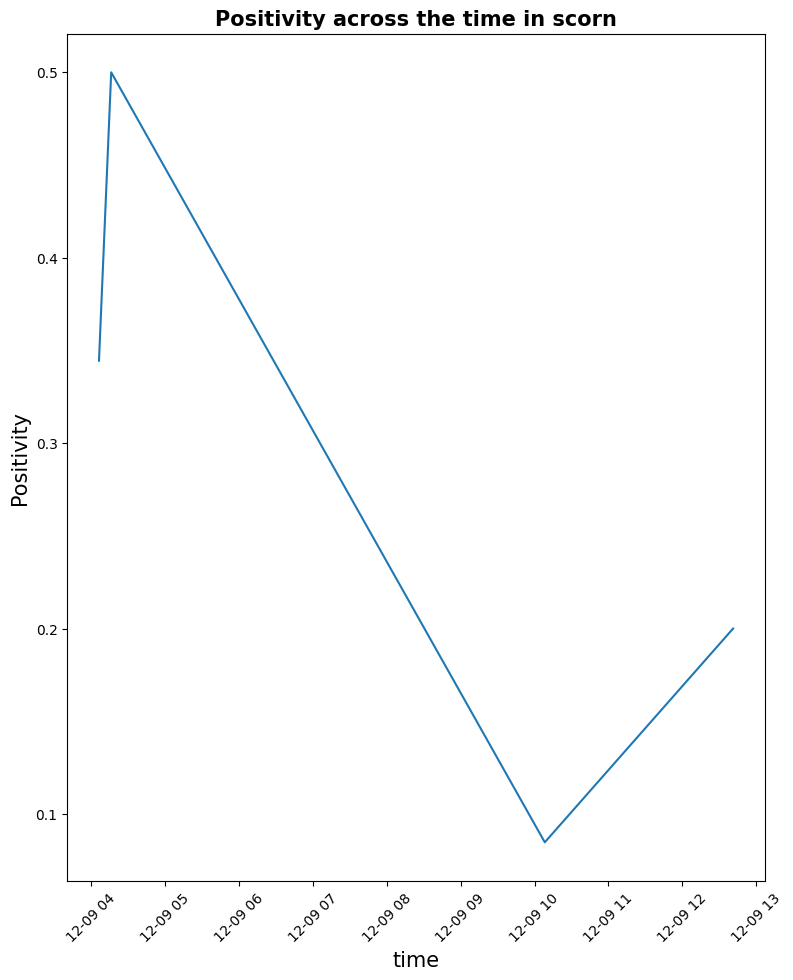

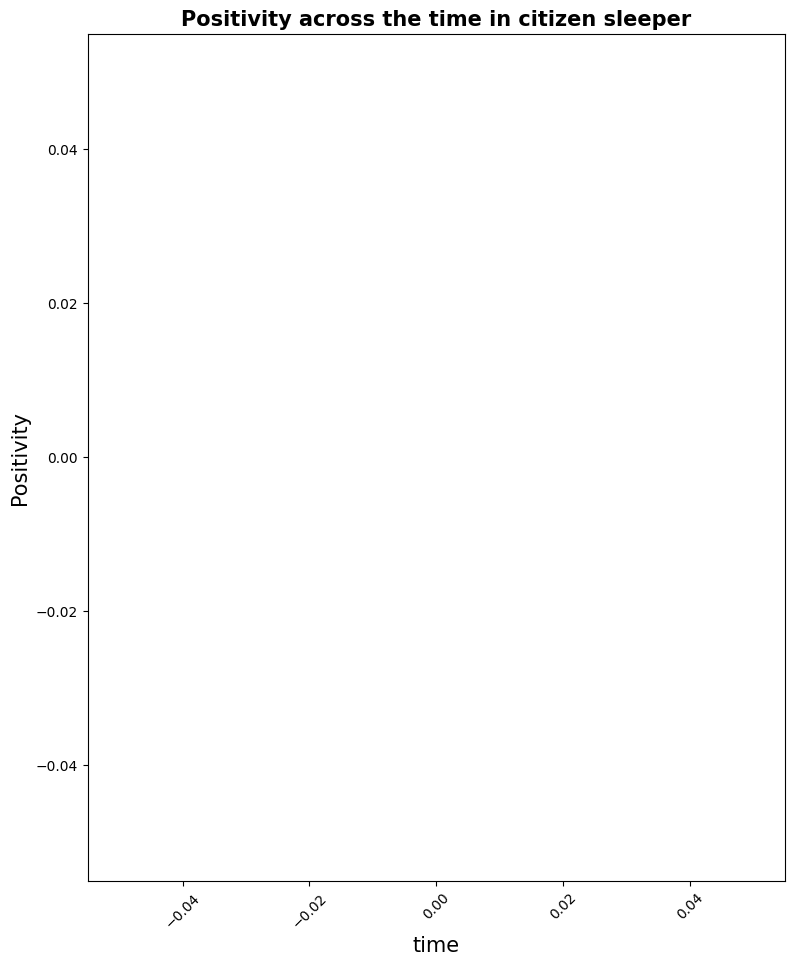

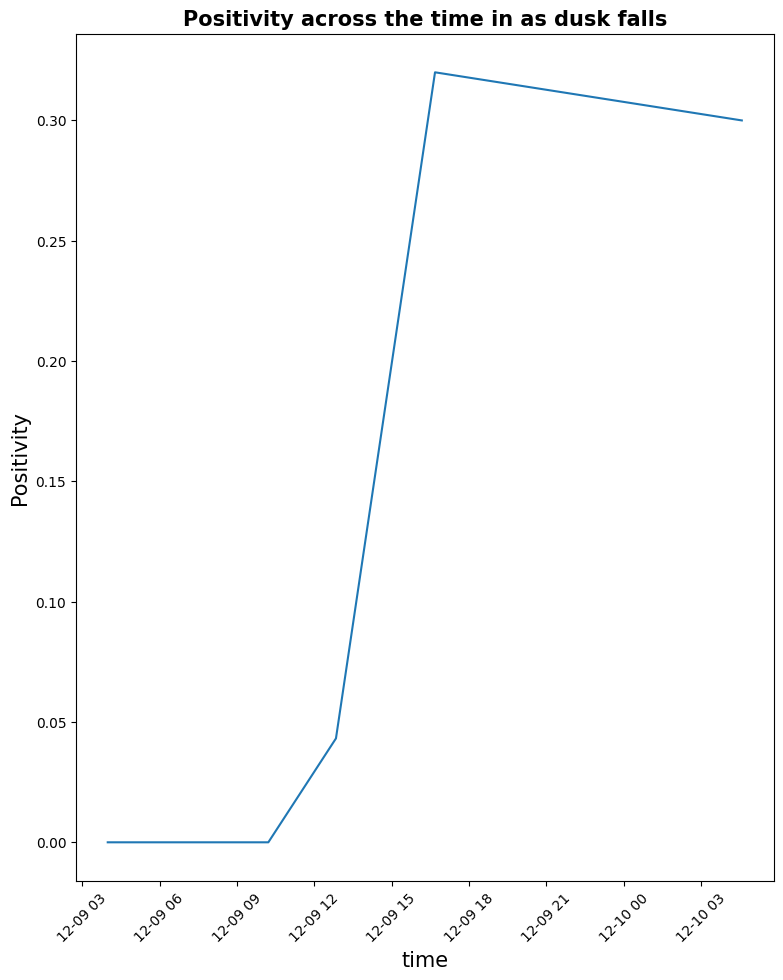

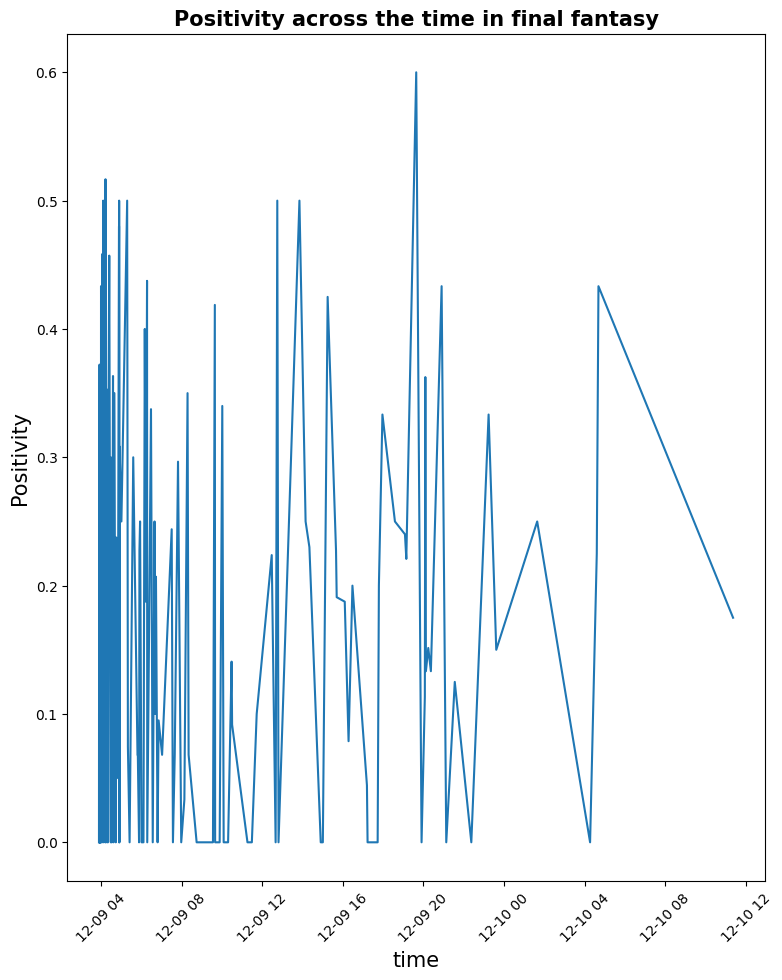

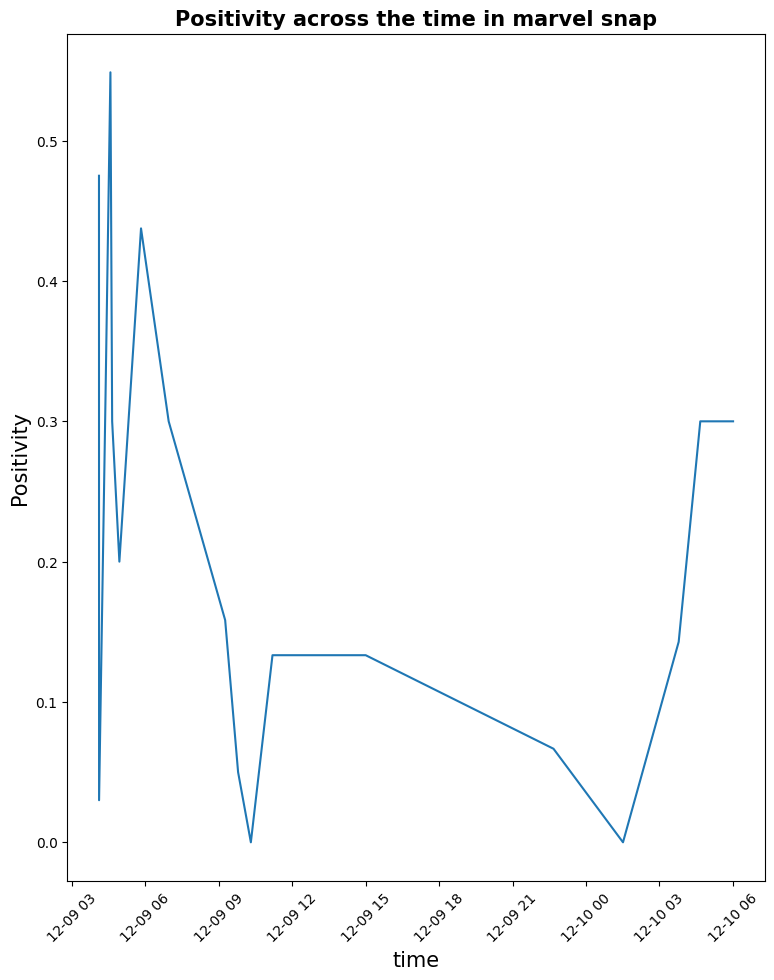

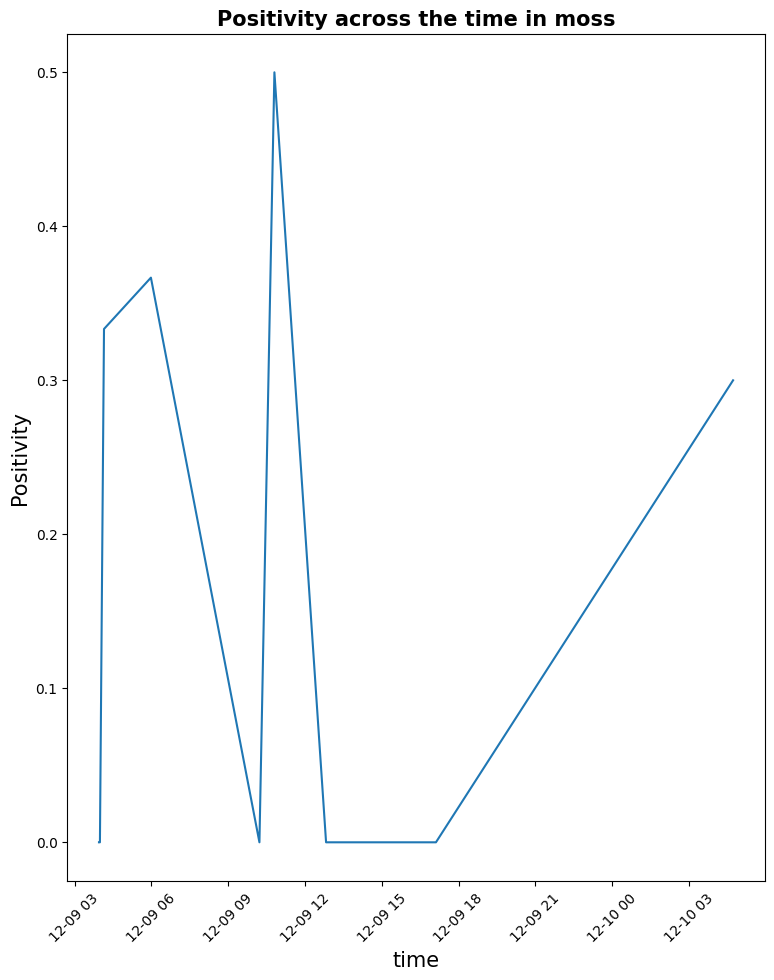

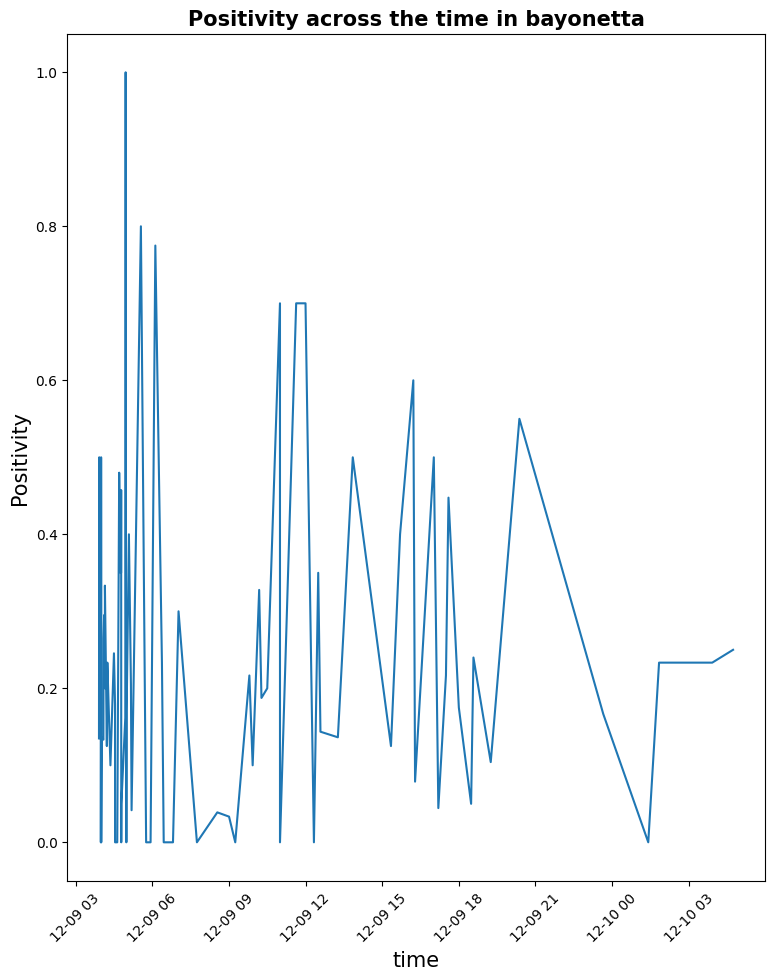

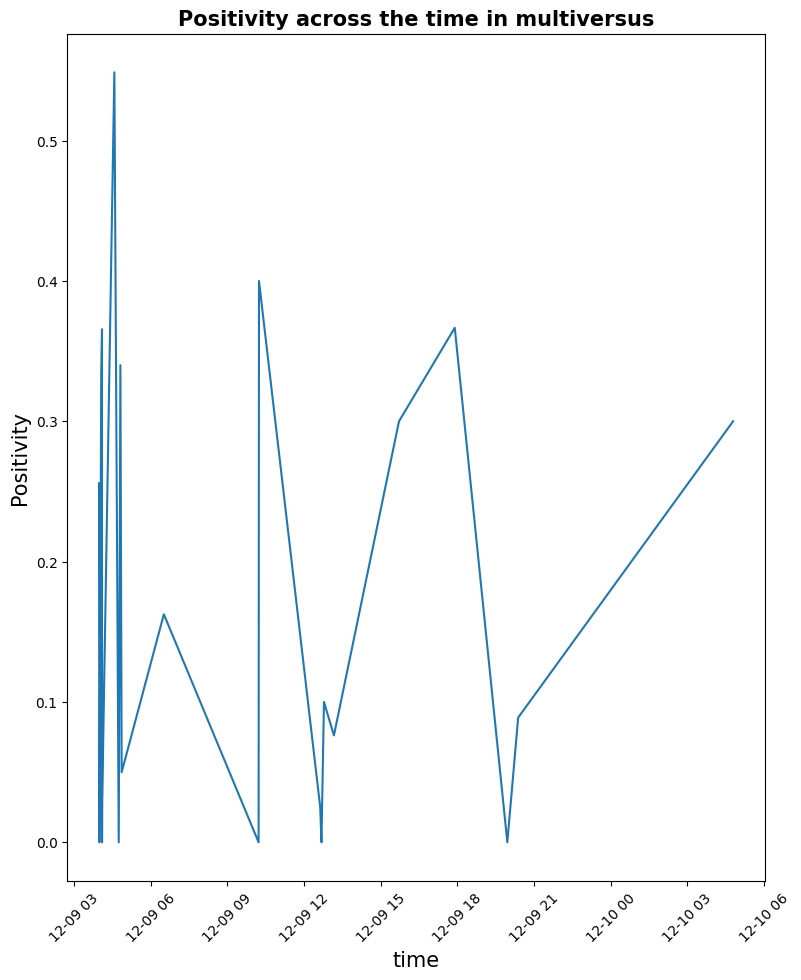

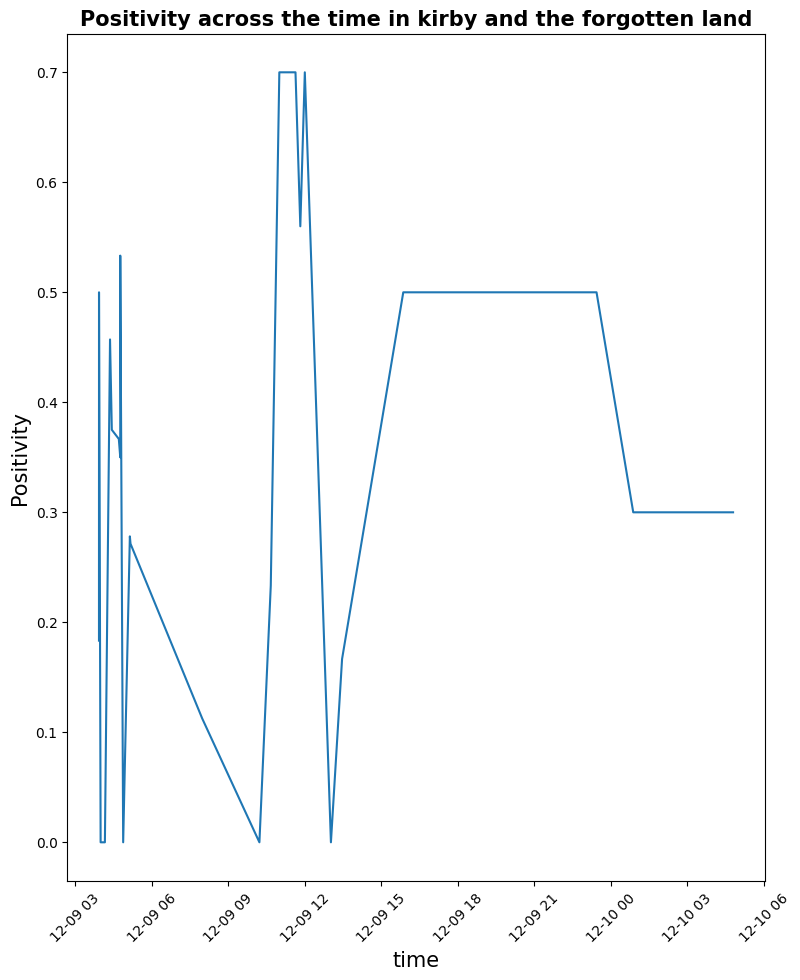

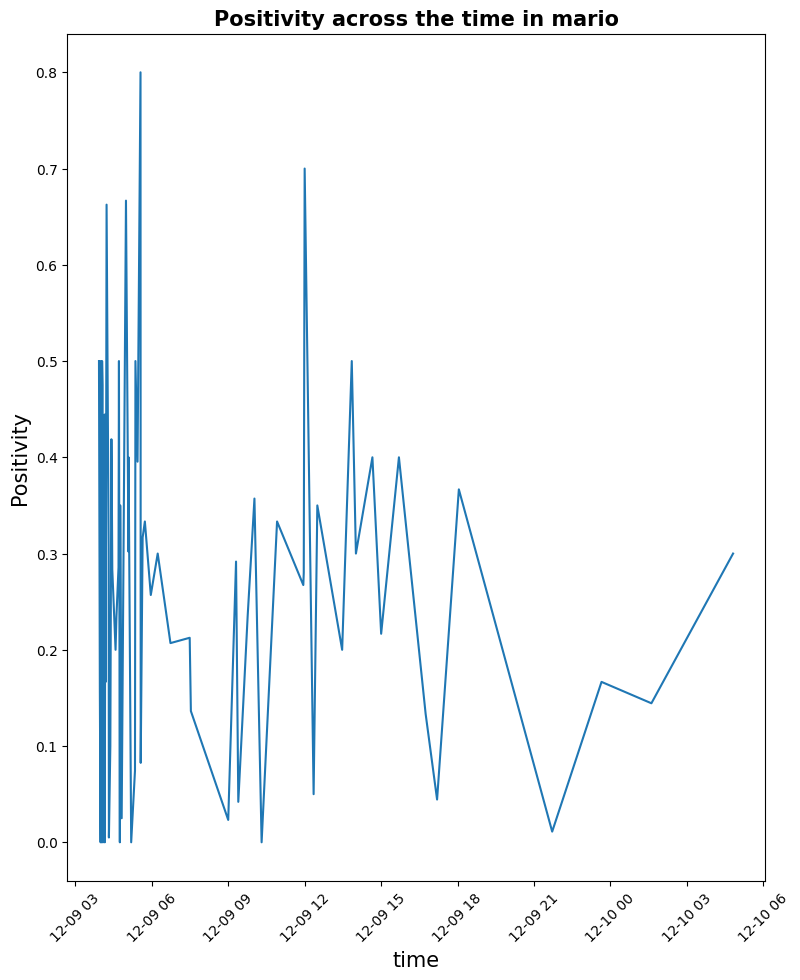

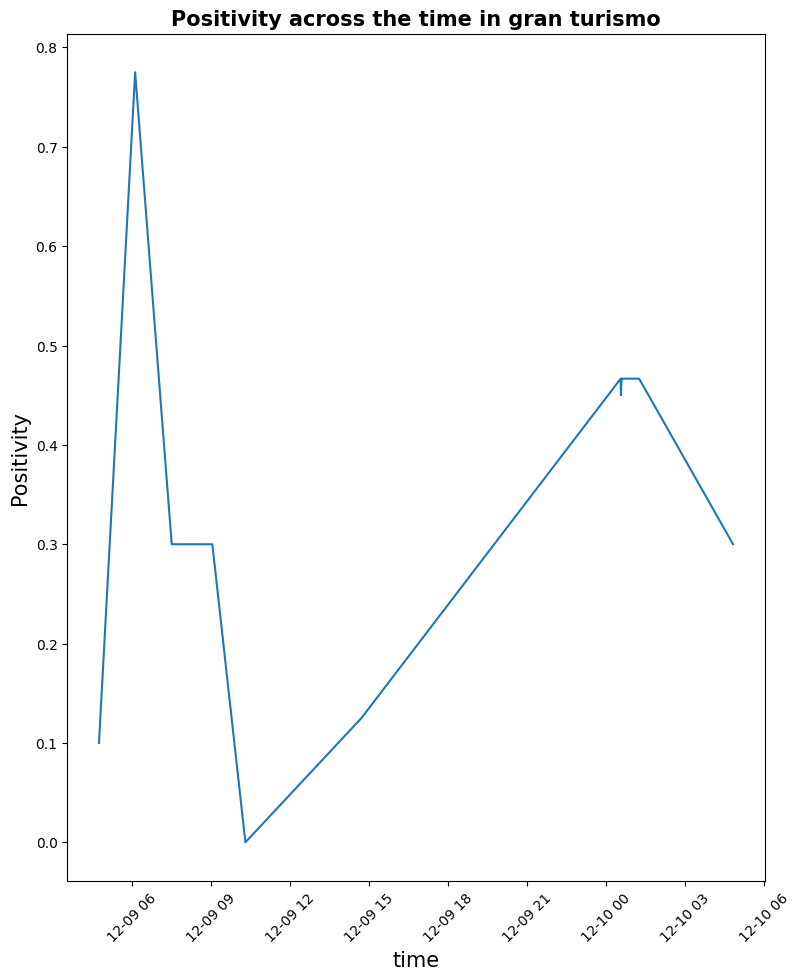

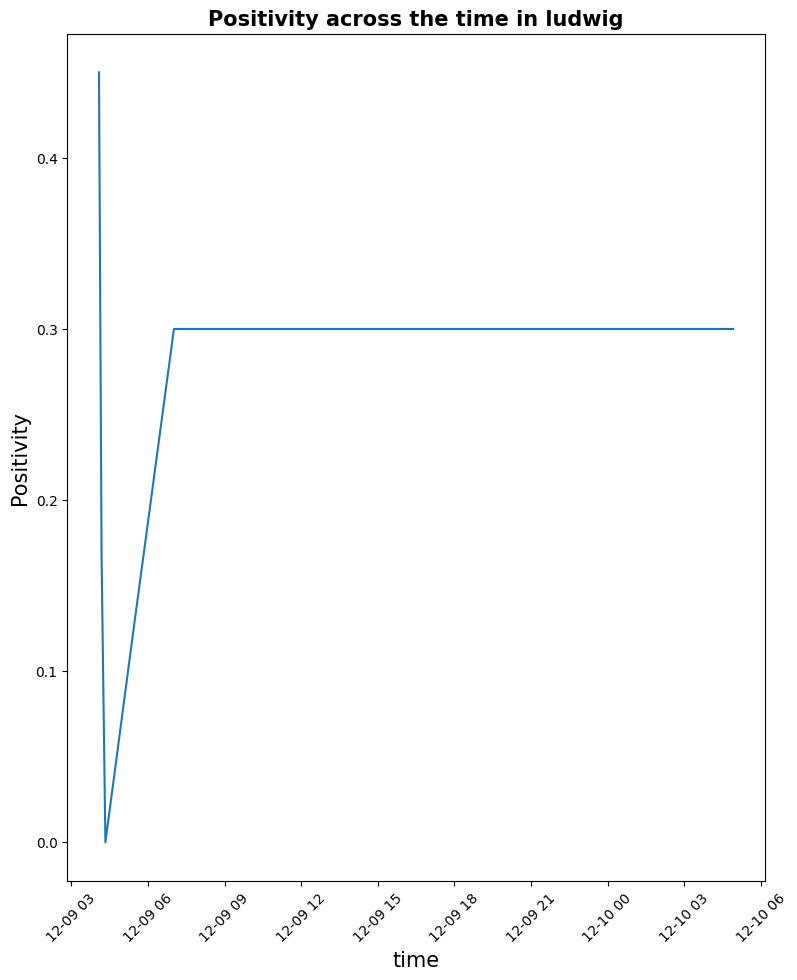

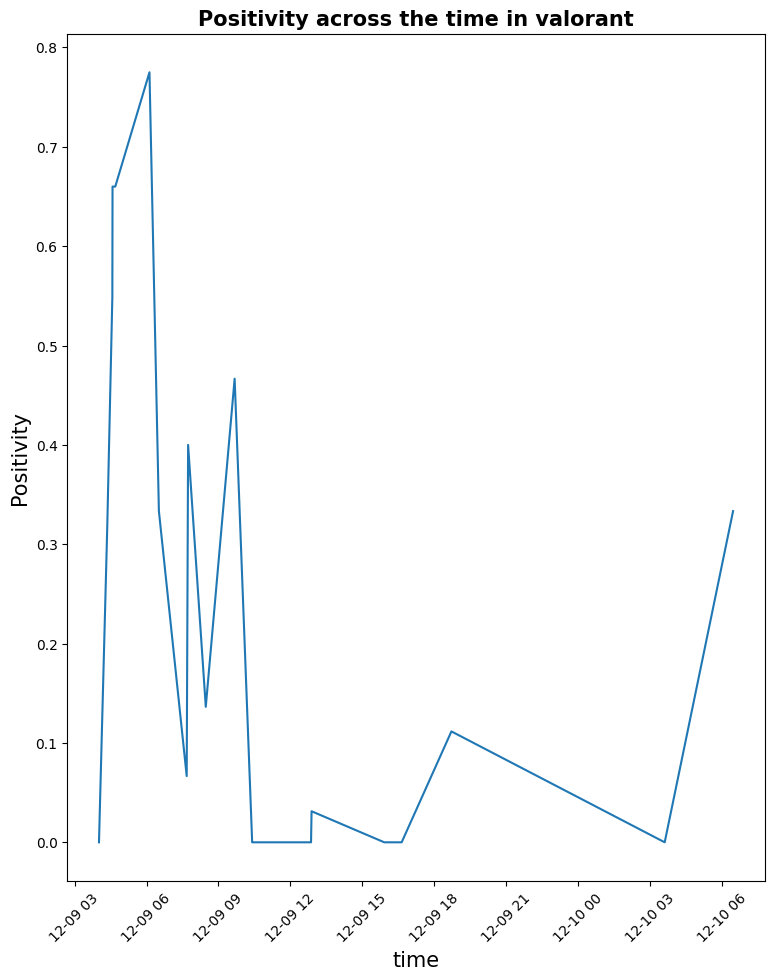

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
dirname="games"
for g in games:
    g_df = pd.read_csv("game_name/"+g+".csv")
    g_df.sort_values(by=["created_at"],ascending=False)
    fig ,ax= plt.subplots()
    fig.set_size_inches(9,11)
    # g_df.time = pd.to_datetime(g_df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    # g_df.set_index(['created_at'],inplace=True)
    ax.set_xlabel('time', fontsize=15)
    ax.set_ylabel('Positivity' , fontsize=15)
    ax.set_title('Positivity across the time in '+g, fontsize=15, fontweight='bold')
    # ax.set_ylabel("positivity" , fontsize=15)
    g_df = g_df.loc[g_df["polarity"]>=0]
    dates = mdates.num2date(mdates.datestr2num(g_df['created_at']))
    # fig.autofmt_xdate()
    # dates = np.asarray(dates, dtype='datetime64[s]')

    # print(len(g_df))
    plt.tick_params(axis='x', labelrotation=45) 
    ax.plot(dates,g_df["polarity"])
    fig.savefig(dirname+"/"+g+"_courbe.png",dpi=400)
    # plt.show()
    # g_df.plot()

#OR 